[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


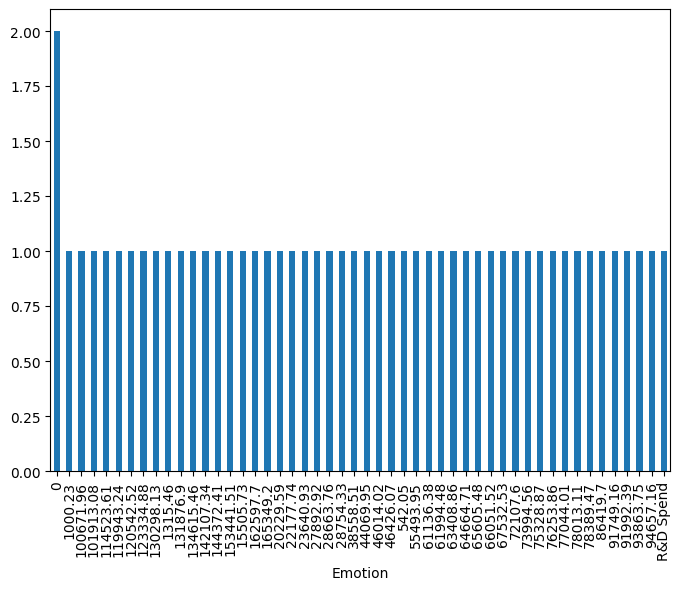

In [11]:
!pip install nltk

import nltk

nltk.download('punkt')

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics

df = pd.read_csv("/content/sample_data.csv",header=None)

df.head()

col = [0,1]
new_df = df [col ]
new_df = new_df [pd. notnull(df [1])]
new_df . columns = ['Emotion', 'Text']
new_df. head()

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby( 'Emotion' ) . Text. count().plot. bar(ylim=0)
plt. show( )

In [12]:
new_df['Text']
new_df['Emotion']

,Emotion
0,R&D Spend
1,165349.2
2,162597.7
3,153441.51
4,144372.41
5,142107.34
6,131876.9
7,134615.46
8,130298.13
9,120542.52


In [13]:
def getTokenizedList(input_df):
    tokenizedList=[]
    for i in range(0, len(input_df)):
        curText = input_df['Text'].iloc[i]
        curText = curText.replace('\n','')
        curTokenized=word_tokenize(curText)
        tokenizedList.append(curTokenized)
    #print(tokenizedList)

    tokenziedListWithoutPunct=[]
    punctList=list(string.punctuation)
    for i in range(0, len(tokenizedList)):
        curList=tokenizedList[i]
        newList=[] #list without stopwords
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenziedListWithoutPunct.append(newList)

    #print(tokenziedListWithoutPunct)
#Stemming
    mystemmer=PorterStemmer()
    tokenziedStemmed=[]
    for i in range(0,len(tokenziedListWithoutPunct)):
        curList=tokenziedListWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed


In [ ]:
def transformSentence(sent):
    s = []
    sent=sent.replace('\n','')
    sentTokenized=word_tokenize(sent)
    s.append (sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0,len(sWithoutPunct)):
        curList=sWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [14]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [16]:
new_df['Text']=getTokenizedList(new_df)
#new_df['Text']

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.3,random_state=1)
#Function to pass the list to the Tfidf vectorizer
def returnPhrase(inputList):
    return inputList

#Extracting features for Naive Bayes
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()


In [21]:
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print (curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.0625


In [23]:
print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

           0       0.06      1.00      0.12         1
     1315.46       0.00      0.00      0.00         1
   153441.51       0.00      0.00      0.00         1
    15505.73       0.00      0.00      0.00         1
    162597.7       0.00      0.00      0.00         1
    20229.59       0.00      0.00      0.00         1
    28754.33       0.00      0.00      0.00         1
      542.05       0.00      0.00      0.00         1
    61136.38       0.00      0.00      0.00         1
    63408.86       0.00      0.00      0.00         1
    64664.71       0.00      0.00      0.00         1
    65605.48       0.00      0.00      0.00         1
    66051.52       0.00      0.00      0.00         1
    75328.87       0.00      0.00      0.00         1
    76253.86       0.00      0.00      0.00         1
    78389.47       0.00      0.00      0.00         1

    accuracy                        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [24]:
curC=2    #cost factor in SVM
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain,Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
#print (curC)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc SVM
0.0


In [25]:
print('Metrics Classification Report : SVM')
print(metrics. classification_report(Y_test, myPredTest))

Metrics Classification Report : SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
   100671.96       0.00      0.00      0.00       0.0
     1315.46       0.00      0.00      0.00       1.0
   153441.51       0.00      0.00      0.00       1.0
    15505.73       0.00      0.00      0.00       1.0
    162597.7       0.00      0.00      0.00       1.0
    20229.59       0.00      0.00      0.00       1.0
    28754.33       0.00      0.00      0.00       1.0
      542.05       0.00      0.00      0.00       1.0
    61136.38       0.00      0.00      0.00       1.0
    63408.86       0.00      0.00      0.00       1.0
    64664.71       0.00      0.00      0.00       1.0
    65605.48       0.00      0.00      0.00       1.0
    66051.52       0.00      0.00      0.00       1.0
    75328.87       0.00      0.00      0.00       1.0
    76253.86       0.00      0.00      0.00       1.0
    78389.47       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer. transform(transformSentence(sent)).toarray())
    return sentPred

In [ ]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer. transform(transformSentence(sent)).toarray())
    return sentPred

In [30]:
sent = "I love you to the moon and back"

#Printing the predicted emotion
print("Navie bayes prediction")
print(predictSentNB(sent))
print("SVM prediction")
print(predictSentSVM(sent))

Navie bayes prediction


NameError: name 'predictSentNB' is not defined

In [31]:
#printing the Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib for plotting

labels = ['anger','disgust','fear','guilt','joy','sadness','shame']
cm = confusion_matrix(Y_test, myPredTest, labels=labels) # Pass labels as a keyword argument
#print(cm)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True,fmt='d',
            xticklabels=labels, yticklabels=labels,cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()

ValueError: At least one label specified must be in y_true